In [1]:
# Importación de librerías

import pandas as pd  # type: ignore # Para manejo de estructuras de datos
import numpy as np  # type: ignore # Para cálculo numérico y análisis de datos
import seaborn as sns  # type: ignore # Para creación de gráficos estadísticos
import matplotlib.pyplot as plt  # type: ignore # Para creación de gráficos en dos dimensiones

# Librerías para implementar modelos de ciencia de datos
from sklearn import metrics  # type: ignore # Para métricas de evaluación de modelos
from sklearn.model_selection import train_test_split  # type: ignore # Para dividir el conjunto de datos en entrenamiento y prueba
from sklearn.linear_model import LinearRegression  # type: ignore # Para implementar modelos de regresión logística
# También se pueden importar otras librerías para modelos específicos, por ejemplo:
# from sklearn.linear_model import LinearRegression  # Para Regresión Lineal
from sklearn.metrics import classification_report, confusion_matrix  # type: ignore # Para generar reportes de clasificación y matrices de confusión
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # type: ignore

In [2]:
# Lectura de datos desde un archivo CSV utilizando pandas
Datos = pd.read_csv('D:/Usuario/Desktop/JuanCa/Juan Camilo Unad/Semestre 6/ANÁLISIS DE DATOS/Unidad 2 - Tarea 3 - Algoritmos de Aprendizaje Supervi/Anexo 2 - Dataset Vehicle/Vehiculos.csv')

In [3]:
# Obtener un resumen estadístico de los datos (count, mean, std,min, max, quartiles 1 2 3)
Datos.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [4]:
print(Datos.head())  # Visualizar las primeras filas del dataframe
print(Datos.info())  # Obtener información sobre las columnas y los tipos de datos

                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250N

In [5]:
# X' contiene la variable independiente y 'Y' la variable dependiente
X = np.array(Datos[['selling_price']])
y = Datos['km_driven'].values

#Crear y ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

#Imprimir la ecuación de la recta
print(f"La ecuación de la recta es: Y = {modelo.intercept_} + {modelo.coef_[0]}*X")

La ecuación de la recta es: Y = 79916.28224280916 + -0.015818921177786313*X


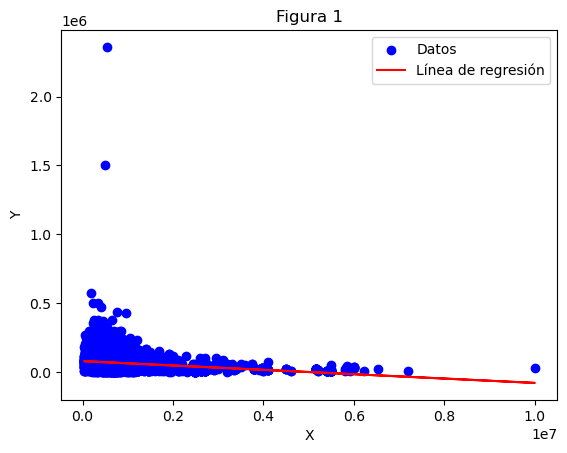

In [6]:
#Graficar los datos y la línea de regresión
plt.scatter(X, y, color='blue', label='Datos')
plt.plot(X, modelo.predict(X), color='red', label='Línea de regresión')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Figura 1')
plt.legend()
plt.show()

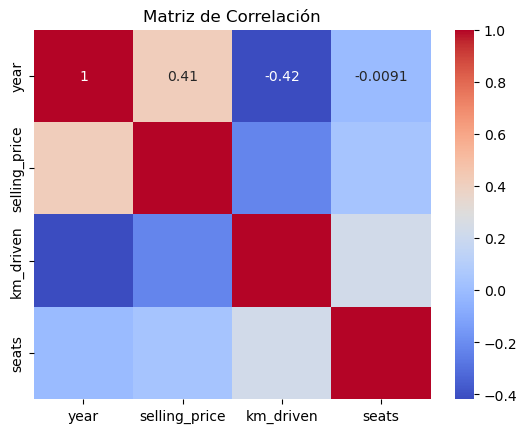

In [7]:
# Seleccionar solo las columnas numéricas del DataFrame
numeric_df = Datos.select_dtypes(include=['float64', 'int64'])
# Matriz de correlación
correlation_matrix = numeric_df.corr()

# Visualizar la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

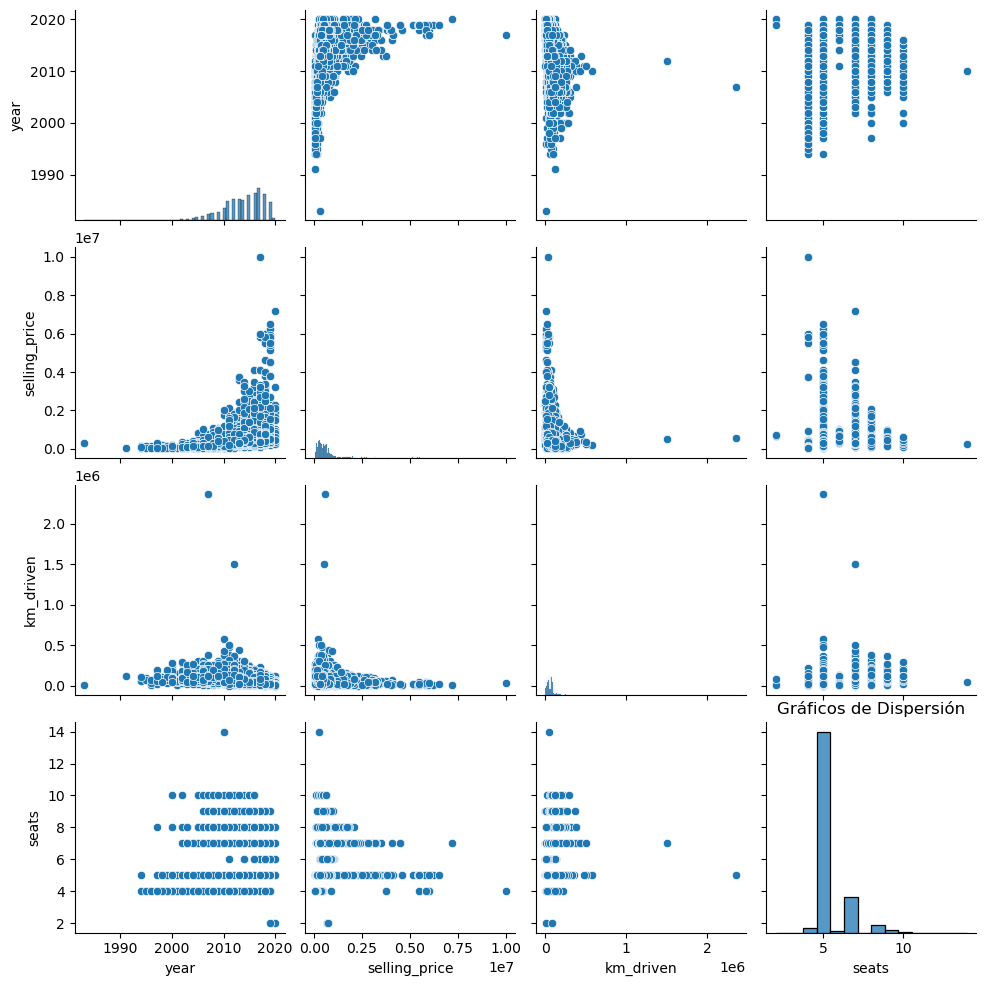

In [8]:
# Gráficos de dispersión para variables relevantes
numeric_df = Datos.select_dtypes(include=['float64', 'int64'])  # Seleccionar solo las variables numéricas
sns.pairplot(numeric_df)
plt.title('Gráficos de Dispersión')
plt.show()

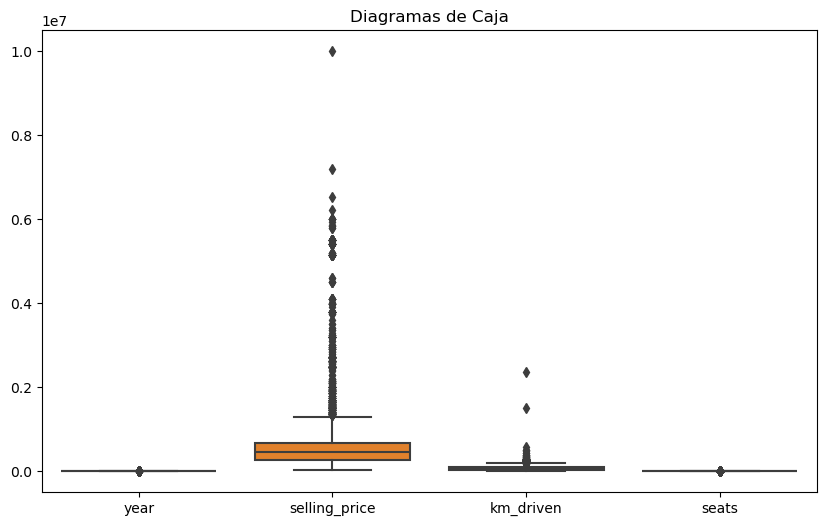

In [9]:
# Diagramas de caja para identificar valores atípicos
plt.figure(figsize=(10,6))  # Establecer el tamaño del gráfico
sns.boxplot(data=Datos)  # Crear diagramas de caja para todas las variables del dataframe
plt.title('Diagramas de Caja')  # Establecer el título del gráfico
plt.show()  # Mostrar el gráfico

In [10]:
# Verificar si hay valores faltantes
valores_faltantes = Datos.isnull().sum()
print(valores_faltantes)

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64


In [11]:
# Calcular el rango intercuartílico (IQR) solo para columnas numéricas
numeric_df = Datos.select_dtypes(include=['float64', 'int64'])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Identificar datos atípicos para cada columna numérica
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()

# Mostrar el conteo de datos atípicos por columna numérica
print("Datos atípicos por columna:")
print(outliers)

Datos atípicos por columna:
year               81
selling_price     600
km_driven         170
seats            1653
dtype: int64


In [20]:
# Detección de datos atípicos en variables numéricas
columnas_numericas = ["km_driven", "year", "selling_price"]
for columna in columnas_numericas:
  Q1 = Datos[columna].quantile(0.25)
  Q3 = Datos[columna].quantile(0.75)
  IQR = Q3 - Q1
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR

  # Eliminación de filas con datos atípicos
  Datos.drop(Datos[(Datos[columna] < limite_inferior) | (Datos[columna] > limite_superior)].index, inplace=True)

In [13]:
# Calcular el rango intercuartílico (IQR) solo para columnas numéricas
numeric_df = Datos.select_dtypes(include=['float64', 'int64'])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Identificar datos atípicos para cada columna numérica
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()

# Mostrar el conteo de datos atípicos por columna numérica
print("Datos atípicos por columna:")
print(outliers)

Datos atípicos por columna:
year                0
selling_price      84
km_driven          30
seats            1319
dtype: int64


In [14]:
# Recuento de los diferentes valores presentes en la columna 'selling_price' del DataFrame 'Datos'
Datos['selling_price'].value_counts()

selling_price
300000     220
600000     209
350000     205
550000     192
450000     191
          ... 
632000       1
905000       1
1145000      1
441000       1
746000       1
Name: count, Length: 538, dtype: int64

In [15]:
# Mostrar los primeros 20 registros de la columna 'selling_price' del DataFrame 'Datos'
Datos[['selling_price']].head(20)

,selling_price
0,450000
1,370000
2,158000
3,225000
4,130000
5,440000
6,96000
8,350000
9,200000
10,500000


In [16]:
# Dividir el conjunto de datos en características (X) y variable objetivo (y)
X = Datos.drop('selling_price', axis=1)  # características
y = Datos['selling_price']  # variable objetivo

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las formas de los conjuntos de datos divididos
print("Forma del conjunto de entrenamiento (X_train):", X_train.shape)
print("Forma del conjunto de prueba (X_test):", X_test.shape)
print("Forma del conjunto de entrenamiento (y_train):", y_train.shape)
print("Forma del conjuto de prueba (y_test):", y_test.shape)

Forma del conjunto de entrenamiento (X_train): (5721, 12)
Forma del conjunto de prueba (X_test): (1431, 12)
Forma del conjunto de entrenamiento (y_train): (5721,)
Forma del conjuto de prueba (y_test): (1431,)
